# Homework w07d03 - Hierarchical clustering

For this exercise we are using the USArrest data which is one of the datasets provided by R, more information can be found on https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html.
It contains data on the rate of arrests for murder, assault and rape per 100000 inhabitants and the percentage of urban population per US state.

In [2]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

#### 1. Load the dataset from the provided file

In [5]:
df = pd.read_csv('datasets/USArrests.csv')
df = df.rename(columns={'Unnamed: 0': 'States'})
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


#### 2. Use the standard scaler to rescale the data

In [16]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
y = LabelEncoder().fit_transform(df.States)
Xs = StandardScaler().fit_transform(df.ix[:,1:])

#### 3. Obtain the principal components for the rescaled data of 2.

In [19]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(Xs)
X = pca.transform(Xs)

#### 4. Perform hierarchical clustering on the rescaled dataset from 2., calculate the cophenetic correlation and distances and plot the resulting dendrogram

In [23]:
Z = linkage(Xs, 'ward')
c, coph_dists = cophenet(Z, pdist(Xs))
c

0.69752656323703888

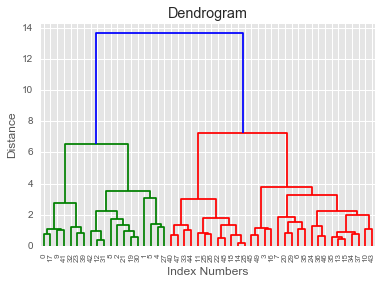

In [24]:
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,
)
plt.show()

#### 5. Perform hierarchical clustering on the first two principal components obtained in 3 , calculate the cophenetic correlation and plot the resulting dendrogram. Do you observe any differences compared to clustering on all features done in 4?

In [32]:
Z = linkage(X[:,:2], 'ward')
c, coph_dists = cophenet(Z, pdist(Xs))
c

0.68882216004937824

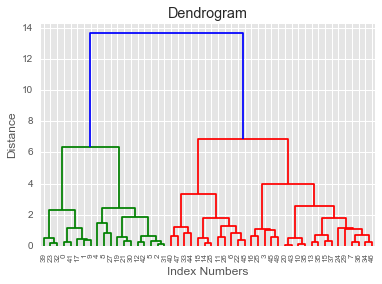

In [33]:
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,
)
plt.show()

The cophenetic correlation is nearly similar in both cases. The dendograms also look very similar, although not exactly.

#### 6. Now take the clustering from 5 and obtain cluster labels for the data points using the fcluster function. Vary the threshold. Produce a plot which shows the number of different clusters obtained versus the threshold value. 

In [57]:
# max_d is the threshold
labels_count = []
for max_d in range(0,14,1):
    clusters = fcluster(Z, max_d, criterion='distance')
    labels_count.append(len(set(clusters)))

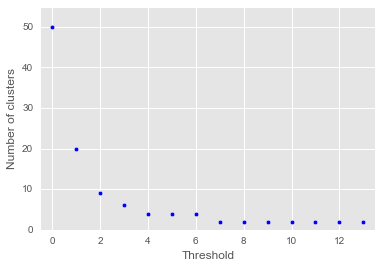

In [63]:
plt.scatter(range(0,14,1),labels_count)
plt.ylabel("Number of clusters")
plt.xlabel("Threshold")
plt.ylim((0,55))
plt.xlim((-.5,13.5))
plt.show()

#### 7. Continue with the results from 5 and 6. Set your threshold so that 4 different clusters are obtained. Produce a scatter plot of the data with the points coloured according to their cluster label.

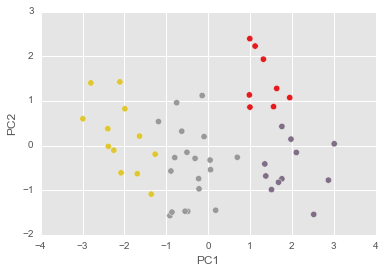

In [87]:
clusters = fcluster(Z, 6, criterion='distance')
plt.scatter(X[:,0], X[:,1], c=clusters, cmap="Set1",s=40)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#### Optional 1: Annotate the points in the scatter plot by the state names and identify the states belonging to the same cluster.

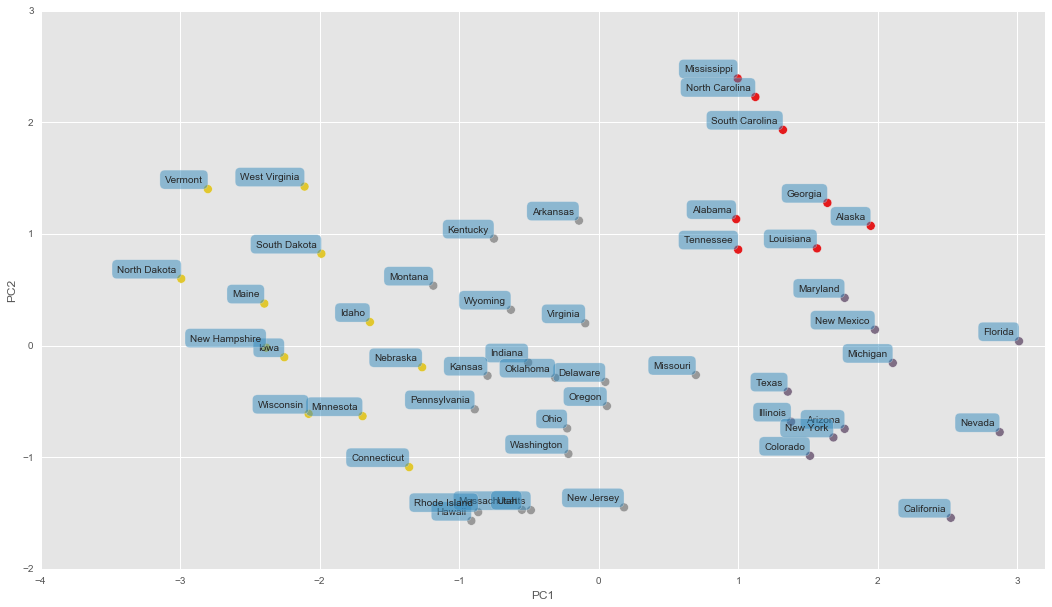

In [107]:
plt.figure(figsize=(18,10))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap="Set1",s=80)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlim((-4,3.2))
plt.ylim((-2,3))


for label, x, y in zip(df.States, X[:, 0], X[:, 1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-5, 5),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', alpha = 0.5))
    
plt.show()

#### Optional 2: Vary the parameters of flcuster, for example the similiarity criterion.